<a href="https://colab.research.google.com/github/chcmagalhaes/DS_Projetos/blob/master/DS03_Panorama_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science na Prática 2.0**

Projeto 03

*by [Carlos Henrique Magalhães](https://github.com/chcmagalhaes)* 

sob orientação:

*by [Sigmoidal](https://www.sigmoidal.ai)* 


---



 
![ ](http://www.caxambu.mg.gov.br/v2/wp-content/uploads/2020/05/WhatsApp-Image-2020-05-15-at-10.16.43.jpeg)
### Análise do COVID no Mundo e Brasil. 

A COVID-19 é uma doença causada pelo coronavírus SARS-CoV-2, que apresenta um quadro clínico que varia de infecções assintomáticas a quadros respiratórios graves. De acordo com a Organização Mundial de Saúde (OMS), a maioria dos pacientes com COVID-19 (cerca de 80%) podem ser assintomáticos e cerca de 20% dos casos podem requerer atendimento hospitalar por apresentarem dificuldade respiratória e desses casos aproximadamente 5% podem necessitar de suporte para o tratamento de insuficiência respiratória (suporte ventilatório).

Vamos anaslisar os dados retirados do site [Our World in Data](https://ourworldindata.org/). Os dados estão atualizados até o dia `08/07`. Usaremos esta fonte de dados como referência, já que os dados no Brasil, não estão ou não são corretamente em partes, divulgados. 

Um detalhe importante é que, como os dados são medidos diariamente, tão logo eles já vão estar desatualizados. 




In [123]:
## importar dados e bibliotecas

import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns


# importar dados:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv") 


Importante para nossa análise é verificar o tamanho do nosso data set, e exibir os primeiros dados:

In [124]:
#Tamanho do dataset
print('Dimensões do DS:',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

#exibir 5 primeiras linhas do DataFrame.
df.head()

Dimensões do DS: 
Variáveis:  34 
Entradas:  29591


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Podemos observar que nosso DS é formado por 34 Variáveis e pouco mais de 29 mil entradas. 

Importante também para analisarmos, exibir as colunas do nosso Dataset:

In [3]:
#Exibir colunas 
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Continuando nossa análise do DS. Vamos aplicar o método `dtypes` para verificarmos os tipos dos valores imputados no Data Frame.

In [4]:
#aplicar método dtypes
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Aplicando esse método, podemos ver que a coluna `Date` está com o tipo *objetct*. E para isso precisaremos alterar para `datetime`, que será impressindivel para nossa analise. 

In [11]:
#ajustar coluna date para o formato datetime
df.date = pd.to_datetime(df.date)

#Conferindo alteração
df.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
total_tests                               float64
new_tests                                 float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64


Agora, vamos verificar a qualidade dos dados imputados. Verificando o percentual de dados vazios nesse datset.

In [13]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

new_tests                          0.711061
new_tests_per_thousand             0.711061
total_tests_per_thousand           0.697273
total_tests                        0.697273
new_tests_smoothed_per_thousand    0.671488
new_tests_smoothed                 0.671488
tests_units                        0.648001
handwashing_facilities             0.590822
extreme_poverty                    0.403738
male_smokers                       0.288365
female_smokers                     0.279916
stringency_index                   0.192221
hospital_beds_per_thousand         0.177047
aged_65_older                      0.111250
gdp_per_capita                     0.108884
aged_70_older                      0.103004
median_age                         0.098375
cvd_death_rate                     0.097597
diabetes_prevalence                0.067791
population_density                 0.044203
life_expectancy                    0.013923
new_deaths_per_million             0.012673
total_deaths_per_million        

Vamos classificar agora nosso dataset, e selecionar pela data mais próxima afim de identificar os paises que estão entre os maiores em novos casos:

In [16]:
# Paises com maior numero de casos acumulado em 09/07/2020:
df.loc[df.date == '2020-07-09'].sort_values(by='total_cases', ascending=False)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
29524,OWID_WRL,NaN,World,2020-07-09,12017661.0,215473.0,549281.0,5375.0,1541.754,27.643,70.468,0.690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
28155,USA,North America,United States,2020-07-09,3055004.0,58906.0,132309.0,829.0,9229.546,177.962,399.722,2.505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
3990,BRA,South America,Brazil,2020-07-09,1713160.0,44571.0,67964.0,1223.0,8059.676,209.687,319.741,5.754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
12542,IND,Asia,India,2020-07-09,767296.0,24879.0,21129.0,487.0,556.010,18.028,15.311,0.353,10740832.0,267061.0,7.783,0.194,240666.0,0.174,samples tested,74.07,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66
22343,RUS,Europe,Russia,2020-07-09,700792.0,6562.0,10667.0,173.0,4802.101,44.965,73.094,1.185,22079294.0,288589.0,151.296,1.978,272913.0,1.870,tests performed,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18314,MSR,North America,Montserrat,2020-07-09,11.0,0.0,1.0,0.0,2200.440,0.000,200.040,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.999000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.16
20952,PNG,Oceania,Papua New Guinea,2020-07-09,11.0,0.0,0.0,0.0,1.229,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.947027e+06,18.220,22.6,3.808,2.142,3823.194,NaN,561.494,17.65,23.500,48.800,NaN,NaN,64.50
4097,VGB,North America,British Virgin Islands,2020-07-09,8.0,0.0,1.0,0.0,264.577,0.000,33.072,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.023700e+04,207.973,NaN,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN,79.07
3573,BES,North America,Bonaire Sint Eustatius and Saba,2020-07-09,7.0,0.0,0.0,0.0,266.962,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.622100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.79



Podemos identificar os paises onde o numero de casos é maior:


* Até o dia 09/07 haviam pouco mais de `12 milhões` de pessoas infectadas com o Covid 19. 

* `Estados Unidos` - Com um total mais de  3 milhoes de casos registrados, seguido de `Brasil`, `India` e `Rusia`. 


Vamos deixar a analise um pouco mais detalhada, plotando os resultados graficamente:





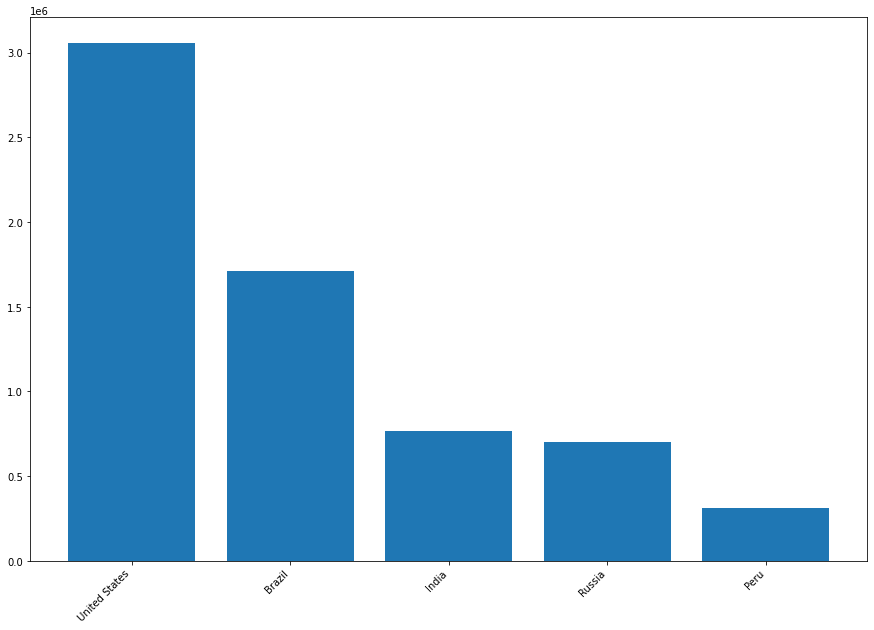

In [66]:
# Plotar grafico dos 5 paises com os maiores numeros de casos registrados.

top5_total_deaths  = df.loc[df.date == '2020-07-09', ['location', 'total_cases']].sort_values(by='total_cases', ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(15 , 10))
ax.bar('location', 'total_cases', data= top5_total_deaths)
plt.xticks(rotation = 45 , ha='right', )
plt.show()

Vamos analisar agora, o total de `mortes` registradas pelo Covid-19. 


In [48]:
#exibir e classificar coluna total_deaths 
df.loc[df.date == '2020-07-09'].sort_values(by='total_deaths', ascending=False)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
29524,OWID_WRL,NaN,World,2020-07-09,12017661.0,215473.0,549281.0,5375.0,1541.754,27.643,70.468,0.690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
28155,USA,North America,United States,2020-07-09,3055004.0,58906.0,132309.0,829.0,9229.546,177.962,399.722,2.505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
3990,BRA,South America,Brazil,2020-07-09,1713160.0,44571.0,67964.0,1223.0,8059.676,209.687,319.741,5.754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
27961,GBR,Europe,United Kingdom,2020-07-09,286979.0,630.0,44517.0,126.0,4227.366,9.280,655.761,1.856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32
13808,ITA,Europe,Italy,2020-07-09,242149.0,193.0,34914.0,15.0,4004.990,3.192,577.455,0.248,5806668.0,52552.0,96.039,0.869,43993.0,0.728,tests performed,NaN,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180,83.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9811,PYF,Oceania,French Polynesia,2020-07-09,62.0,0.0,0.0,0.0,220.716,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.809040e+05,77.324,32.7,7.775,4.593,NaN,NaN,NaN,22.63,NaN,NaN,NaN,NaN,77.66
18086,MNG,Asia,Mongolia,2020-07-09,227.0,7.0,0.0,0.0,69.243,2.135,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.278292e+06,1.980,28.6,4.031,2.421,11840.846,0.5,460.043,4.82,5.500,46.500,71.180,7.000,69.87
9045,FRO,Europe,Faeroe Islands,2020-07-09,188.0,0.0,0.0,0.0,3847.334,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.886500e+04,35.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.67
10666,GIB,Europe,Gibraltar,2020-07-09,179.0,0.0,0.0,0.0,5312.992,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.369100e+04,3457.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.93


 Notamos, praticamente um repetição dos números mostrados anteriormente em total de casos, para o primeiro e segundo colocados:

* `Estados Unidos`, lidera o ranking com mais de 132 mil casos, seguido de `Brasil`, `Reino Unido` e `Italia`. 

Analisando graficamente esse dataframe temos:



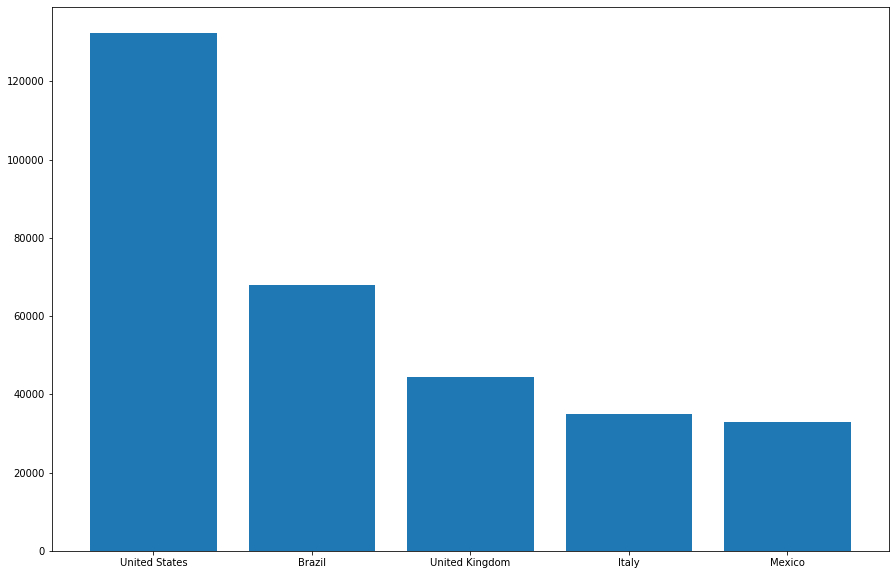

In [125]:
 #Exibir Grafico de total_deaths, Contendo os 10 maiores paises. 

top5_total_deaths = df.loc[df.date == '2020-07-09', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6]

 fig, ax = plt.subplots(figsize=(15 , 10))

 ax.bar('location','total_deaths' , data = top5_total_deaths)
 plt.show()


Vamos analisar agora a coluna `total_deaths_per_millon`, que representa o total de mortes atribuídas ao COVID-19 por 1.000.000 de pessoas de um determinado país. 

Em seguida, plotaremos graficamente os resultados. 



In [126]:
#exibir e classificar coluna total_deaths_per_million
df.loc[df.date == '2020-07-09'].sort_values(by='total_deaths_per_million', ascending=False)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
22992,SMR,Europe,San Marino,2020-07-09,713.0,0.0,42.0,0.0,21008.899,0.000,1237.551,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,33938.0,556.667,NaN,NaN,NaN,56861.470,NaN,NaN,5.64,NaN,NaN,NaN,3.80,84.97
2889,BEL,Europe,Belgium,2020-07-09,62210.0,87.0,9778.0,2.0,5367.736,7.507,843.686,0.173,1052518.0,7245.0,90.816,0.625,7639.0,0.659,units unclear,42.59,11589616.0,375.564,41.8,18.571,12.849,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63
615,AND,Europe,Andorra,2020-07-09,855.0,0.0,52.0,0.0,11065.812,0.000,673.008,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73
27961,GBR,Europe,United Kingdom,2020-07-09,286979.0,630.0,44517.0,126.0,4227.366,9.280,655.761,1.856,6849508.0,131848.0,100.897,1.942,100261.0,1.477,tests performed,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
25018,ESP,Europe,Spain,2020-07-09,253056.0,543.0,28401.0,5.0,5412.409,11.614,607.446,0.107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18086,MNG,Asia,Mongolia,2020-07-09,227.0,7.0,0.0,0.0,69.243,2.135,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3278292.0,1.980,28.6,4.031,2.421,11840.846,0.5,460.043,4.82,5.5,46.5,71.180,7.00,69.87
15142,LAO,Asia,Laos,2020-07-09,19.0,0.0,0.0,0.0,2.611,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7275556.0,29.715,24.4,4.029,2.322,6397.360,22.7,368.111,4.00,7.3,51.2,49.839,1.50,67.92
9308,FJI,Oceania,Fiji,2020-07-09,21.0,2.0,0.0,0.0,23.426,2.231,0.000,0.000,5621.0,135.0,6.270,0.151,66.0,0.074,samples tested,NaN,896444.0,49.562,28.6,6.224,3.284,8702.975,1.4,412.820,14.49,10.2,34.8,NaN,2.30,67.44
15524,LSO,Africa,Lesotho,2020-07-09,91.0,0.0,0.0,0.0,42.479,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2142252.0,73.562,22.2,4.506,2.647,2851.153,59.6,405.126,3.94,0.4,53.9,2.117,NaN,54.33


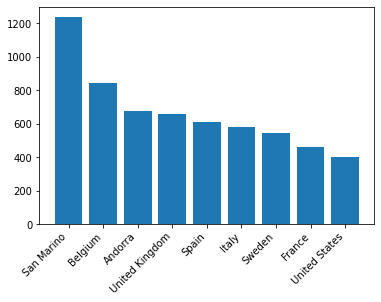

In [127]:
 
 #Exibir Grafico de total_deaths_per_million. Contendo os 10 maiores paises. 
 top10_total_deaths_per_million  = df.loc[df.date == '2020-07-09', ['location', 'total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False)[0:9]

 fig, ax = plt.subplots()
 ax.bar('location','total_deaths_per_million',data= top10_total_deaths_per_million)
 plt.xticks(rotation = 45 , ha='right')

 plt.show()


Tomando base, esse output. Podemos notar, que paises com população menor, o "estrago" do virus tem sido bem maior do que em paises com uma população maior. Podemos citar com um exemplo disso, `Italia` e `Espanha`, onde os o aumento do numero de casos, estrapolou os limtes da saúde desses países.

Porém, se atualizarmos os numeros de novos casos para países como a Itália, vemos que a curva está decresendo, oque já indica uma estabilização do vírus neste país. 

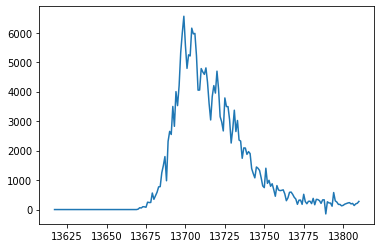

In [128]:
#Grafico de linhas para casos novos registrados 
total_italy = df.loc[df.location ==  'Italy' , 'new_cases',].plot()


Agora, vamos comparar o grafico acima com o a evolução do vírus no Mundo:

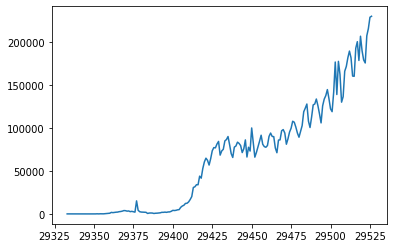

In [78]:
#Grafico de linhas para casos novos registrados no Mundo 
total_world_1 = df.loc[df.location ==  'World' , 'new_cases',].plot()

###Análise para o Brasil

Vamos agora, fazer uma breve analise com os dados tomando o Brasil como referencia. 


In [122]:
#criando uma copia para do Data Set para o Brasil. 

df_brasil = df.loc[df.location == 'Brazil'].copy()

df_brasil.head()
 

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3799,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3800,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3801,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3802,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3803,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


Vamos verificar quando foi registrada a primeira morte no Brasil.

In [90]:
#Verificar data da primeira morte no Brasil.
df_brasil.loc[df_brasil['total_deaths'] == 1].sort_values(by='date', ascending =False)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3877,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


Agora, vamos verificar quando quanto tempo demorou do primeiro caso registrado até a primeira morte confirmada. 


In [103]:
#listar casos no Brasil 
df_brasil.loc[df_brasil['total_cases' and 'new_cases'] == 1.0 ].sort_values(by='date', ascending = True).head(1)



,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3856,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [104]:
#Realizar diferença entre o primeiro caso e a primeira morte registradas

dif = df_brasil.date.loc[3877] - df_brasil.date.loc[3856]
print(dif)

21 days 00:00:00


 Acima, podemos identificar que o primeiro caso foi identificado em `26/02/2020`. Pois temos o valor 1 para `news_cases` e `total_cases` iguais a 1.

 E também retornamos o output, confirmando que entre o primeiro caso e a primeira morte tivemos `21 Dias`. 

Agora, vamos analisar graficamente a evolução do virus no Brasil. 

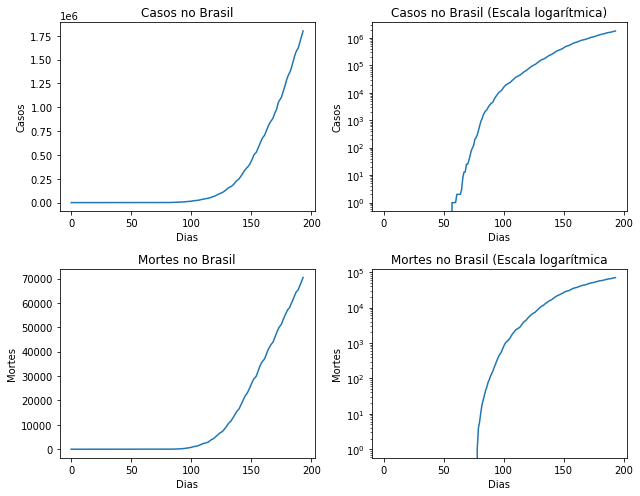

In [129]:
#Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

x = list(range(194))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)
plt.tight_layout()


## Conclusões Finais


Estamos vivendo uma época da qual a humanidade nunca viveu. Como vimos os números, apesar das mortes em alguns países estão em queda, precisamos entender que há "várias pandemias" acontecendo em estágios diferentes, possibilitando até o ressurgmento em paises que já estão em processos de flexibilização. 

Pouco se sabe sobre o potencial do vírus, porém, há várias frentes de pesquisas testanto medicamentos e vacinas para que possamos voltar ao nosso convivio normal. 

Importante, que vale ressaltar nesse dataset é que nenhuma verdade é absoluta, nada que possa ter sido representada aqui pode ser levada em cem por cento de verdade, já que há outras fontes que podem ou não trazer dados diferentes. 

Cabe a nós, nos protegermos e protegermos uns aos outros para que possamos `juntos` superar esse vírus. 

